In [1]:
# import the necessary packages
from collections import deque
import numpy as np
import argparse
import pickle
import cv2
import os
import json
from keras.models import load_model
import shutil

from keras.preprocessing import image                  
from tqdm.notebook import tqdm
from PIL import ImageFile                            
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# with open('/content/drive/MyDrive/CV_project/myModel_load.h5', "rb") as file:
#   model = load_model(file)
model = load_model('/content/drive/MyDrive/CV_project_final/models /CNN_model.hdf5')

In [4]:
JSON_DIR = os.path.join("/content/drive/MyDrive/CV_project/","json_files")

if not os.path.exists(JSON_DIR):
    os.makedirs(JSON_DIR)


In [5]:
with open(os.path.join("/content/drive/MyDrive/CV_project/", "labels_list.pkl"),"rb") as handle:
    labels_id = pickle.load(handle)


In [6]:
ImageFile.LOAD_TRUNCATED_IMAGES = True 


In [7]:
def predict_result(image_tensor):

    ypred_test = model.predict(image_tensor,verbose=1)
    ypred_class = np.argmax(ypred_test,axis=1)
    print(ypred_class)
    labels_id ={'c0': 0, 'c1': 1, 'c2': 2, 'c3': 3, 'c4': 4, 'c5': 5, 'c6': 6, 'c7': 7, 'c8': 8, 'c9': 9}
    id_labels = {}
    # id_labels = {'c0': 0, 'c6': 1, 'c7': 2, 'c9': 3, 'c4': 4, 'c8': 5, 'c2': 6, 'c1': 7, 'c3': 8, 'c5': 9}
    for class_name,idx in labels_id.items():
        id_labels[idx] = class_name
    ypred_class = int(ypred_class)
    print(id_labels[ypred_class])


    #to create a human readable and understandable class_name 
    class_name = dict()
    class_name["c0"] = "SAFE_DRIVING"
    class_name["c1"] = "TEXTING_RIGHT"
    class_name["c2"] = "TALKING_PHONE_RIGHT"
    class_name["c3"] = "TEXTING_LEFT"
    class_name["c4"] = "TALKING_PHONE_LEFT"
    class_name["c5"] = "OPERATING_RADIO"
    class_name["c6"] = "DRINKING"
    class_name["c7"] = "REACHING_BEHIND"
    class_name["c8"] = "HAIR_AND_MAKEUP"
    class_name["c9"] = "TALKING_TO_PASSENGER"


    with open(os.path.join(JSON_DIR,'class_name_map.json'),'w') as secret_input:
        json.dump(class_name,secret_input,indent=4,sort_keys=True)

    with open(os.path.join(JSON_DIR,'class_name_map.json')) as secret_input:
        info = json.load(secret_input)
        label = info[id_labels[ypred_class]]
        print(label)
    
    return label

In [8]:
!pip install mediapipe

In [9]:
import mediapipe as mp

def media_pipe(imgg):

    mp_drawing = mp.solutions.drawing_utils
    mp_drawing_styles = mp.solutions.drawing_styles
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=False, smooth_segmentation = False, min_detection_confidence=0.5) 

    
    image = imgg
    image_height, image_width, _ = image.shape
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  
    BG_COLOR = (192, 192, 192) # gray
    annotated_image = image.copy()
    del image 
    # condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    # bg_image = np.zeros(annotated_image.shape, dtype=np.uint8)
    # bg_image[:] = BG_COLOR
    # annotated_image = np.where(condition, annotated_image, bg_image)
    # Draw pose landmarks on the image.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    

    # directory = '/content/drive/MyDrive/CV_project/merged_dataset_mediaPipe/c'+str(i)
    # img = annotated_image 
    # # filename = filenamee
    # del annotated_image 
    # cv2.imwrite(os.path.join(directory , str(filenamee)), img) 
    del pose, mp_pose, mp_drawing_styles, mp_drawing
    return annotated_image 

1/1 [==============================] - 0s 463ms/step
[0]
c0
SAFE_DRIVING


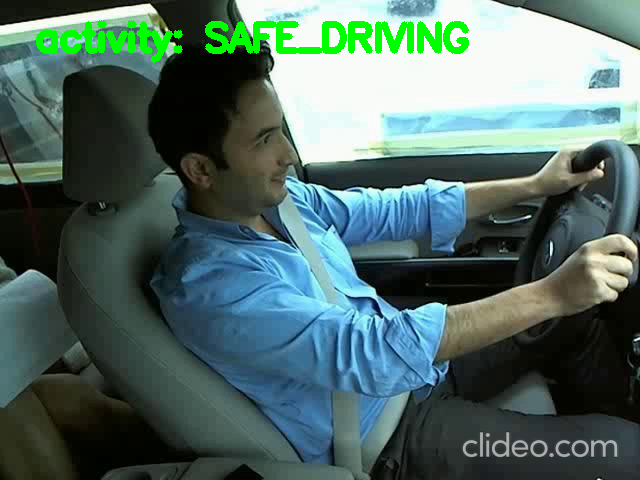

1/1 [==============================] - 0s 54ms/step
[0]
c0
SAFE_DRIVING


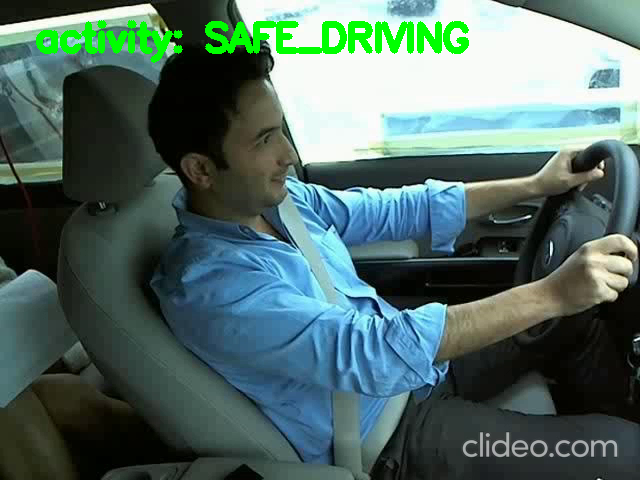

1/1 [==============================] - 0s 41ms/step
[0]
c0
SAFE_DRIVING


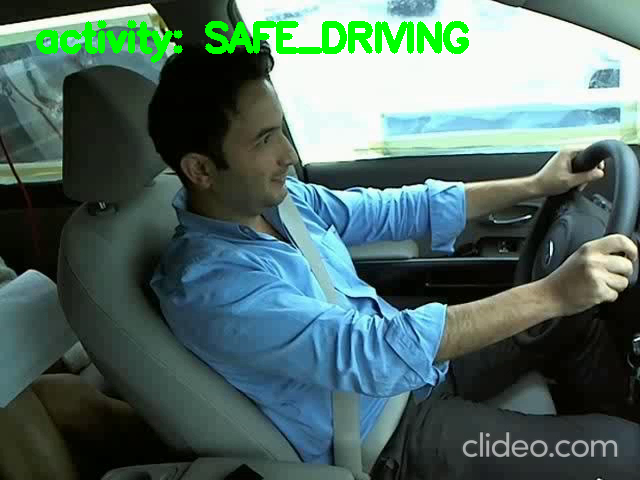

1/1 [==============================] - 0s 41ms/step
[0]
c0
SAFE_DRIVING


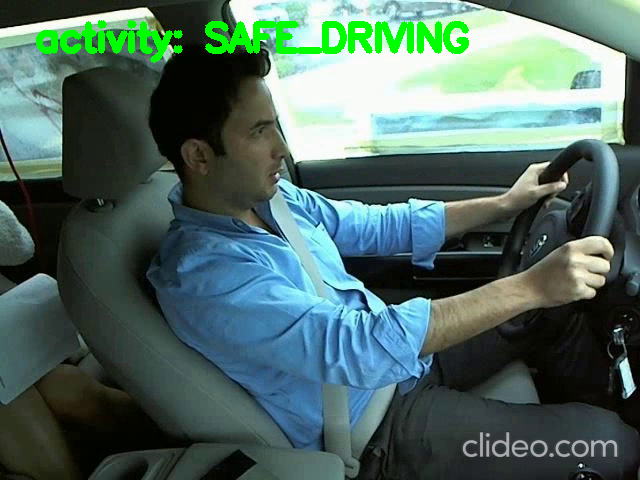

1/1 [==============================] - 0s 41ms/step
[0]
c0
SAFE_DRIVING


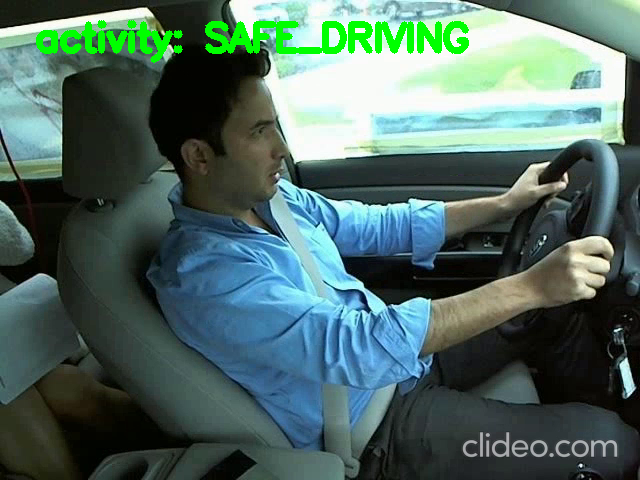

1/1 [==============================] - 0s 42ms/step
[0]
c0
SAFE_DRIVING


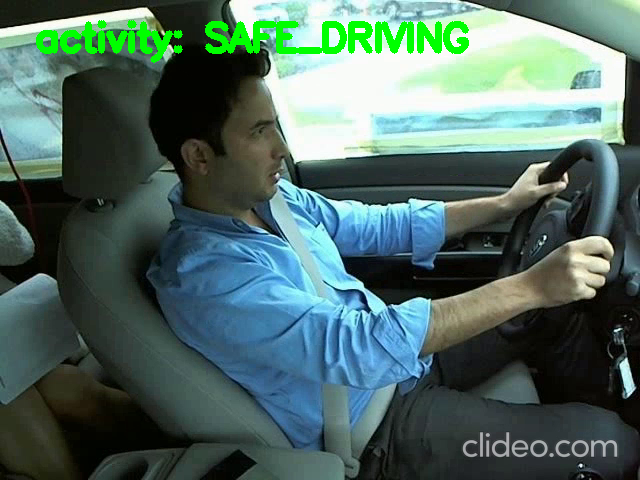

1/1 [==============================] - 0s 45ms/step
[0]
c0
SAFE_DRIVING


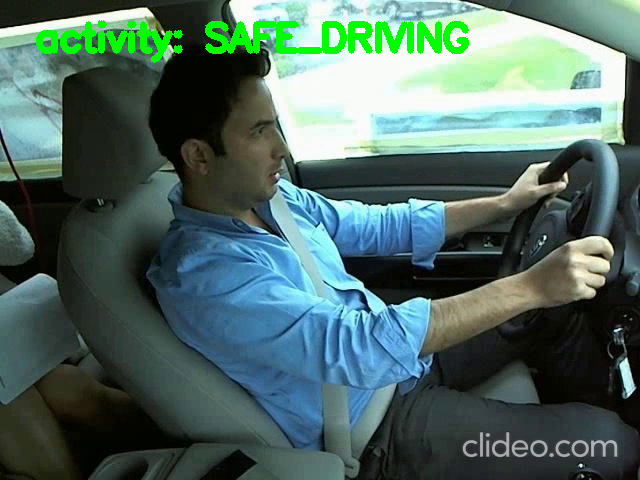

1/1 [==============================] - 0s 41ms/step
[0]
c0
SAFE_DRIVING


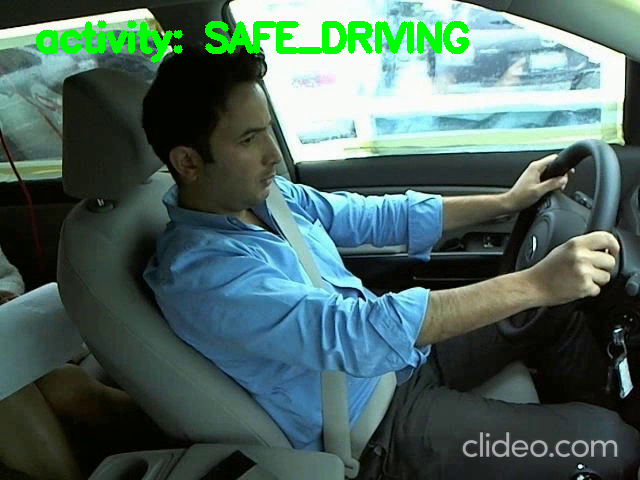

1/1 [==============================] - 0s 41ms/step
[0]
c0
SAFE_DRIVING


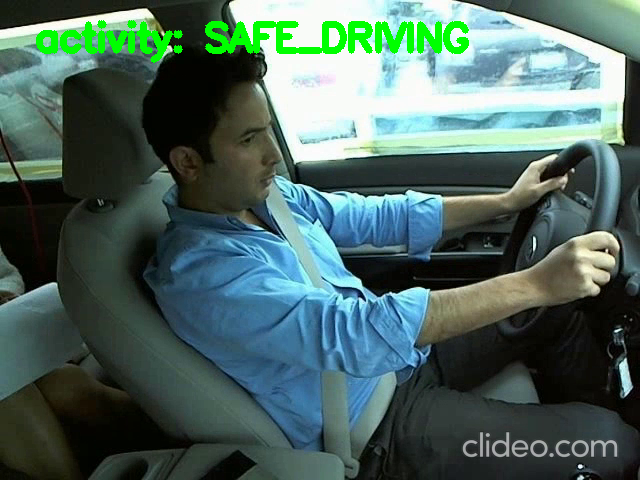

1/1 [==============================] - 0s 43ms/step
[0]
c0
SAFE_DRIVING


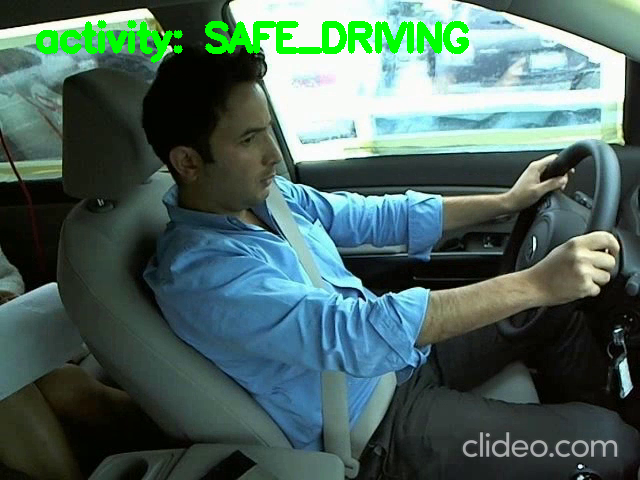

1/1 [==============================] - 0s 96ms/step
[0]
c0
SAFE_DRIVING


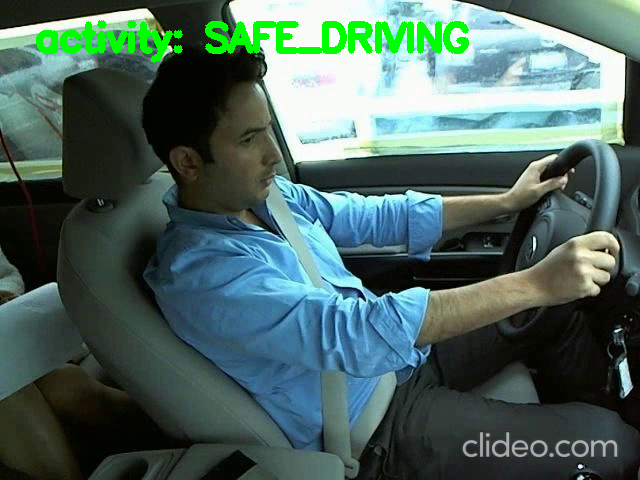

1/1 [==============================] - 0s 78ms/step
[0]
c0
SAFE_DRIVING


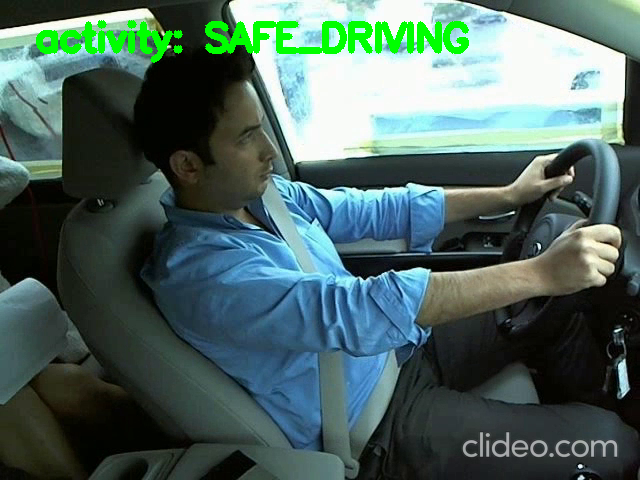

1/1 [==============================] - 0s 74ms/step
[0]
c0
SAFE_DRIVING


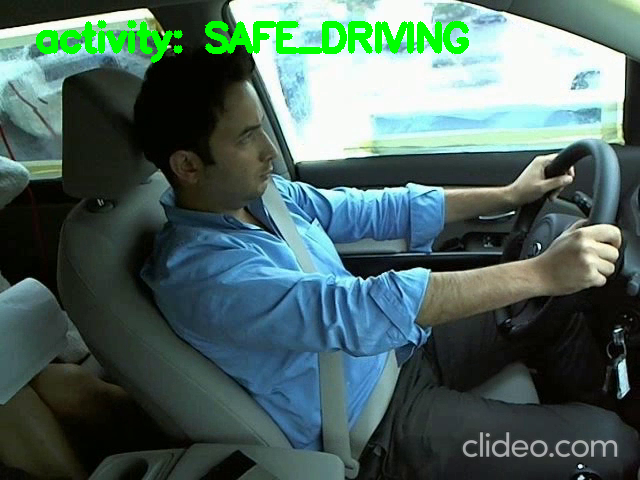

1/1 [==============================] - 0s 87ms/step
[0]
c0
SAFE_DRIVING


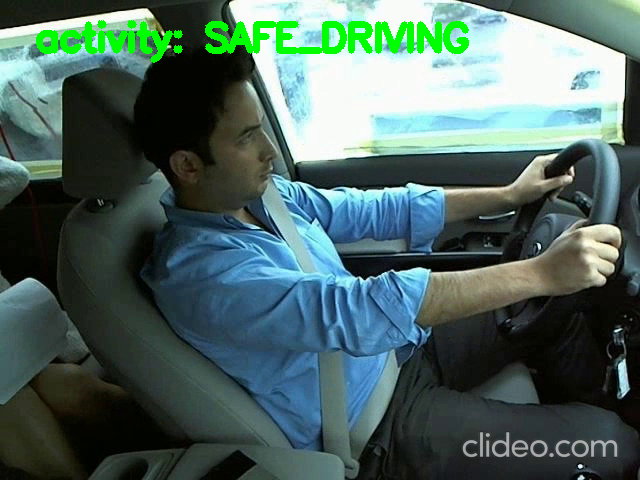

1/1 [==============================] - 0s 69ms/step
[0]
c0
SAFE_DRIVING


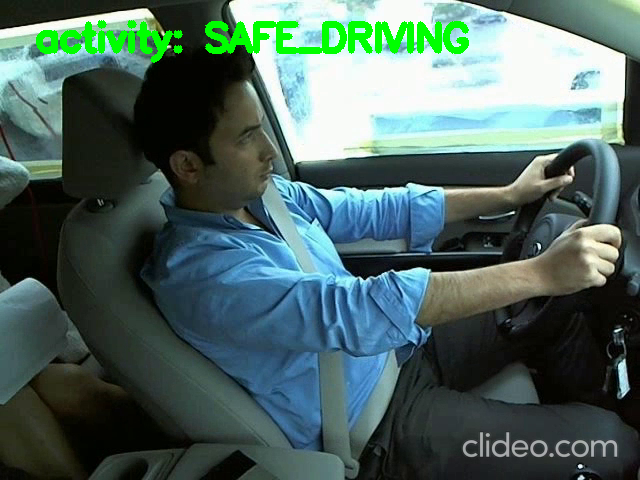

1/1 [==============================] - 0s 134ms/step
[0]
c0
SAFE_DRIVING


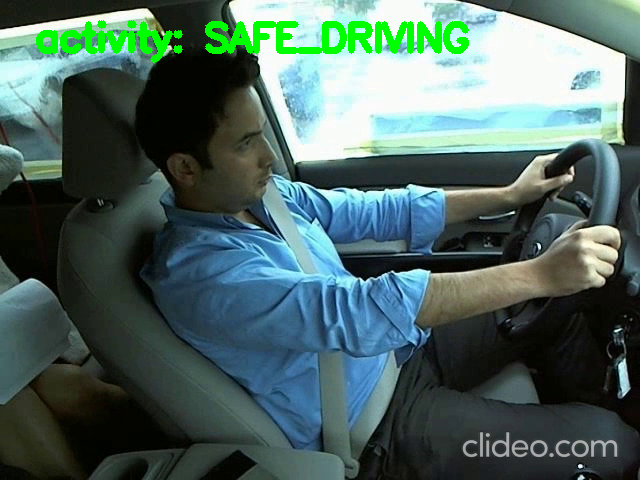

1/1 [==============================] - 0s 41ms/step
[0]
c0
SAFE_DRIVING


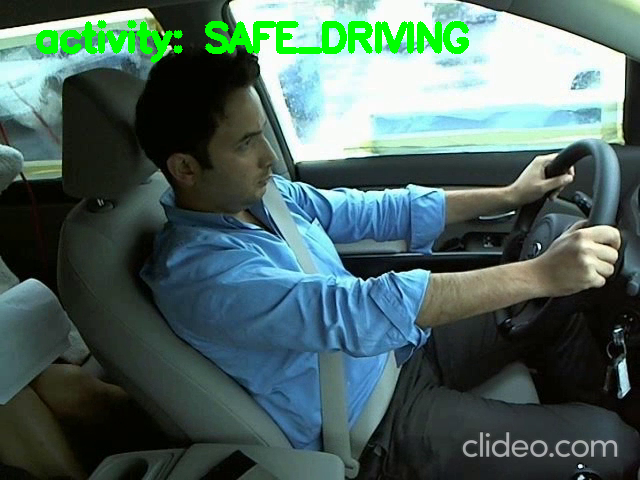

In [ ]:

INPUT_VIDEO_FILE = "/content/drive/MyDrive/CV_project_final/Demo /input_video.mp4"
OUTPUT_VIDEO_FILE = "/content/drive/MyDrive/CV_project_final/Demo /my_output_video_fps15.mp4"
# initialize the video stream, pointer to output video file, and
# frame dimensions
vs = cv2.VideoCapture(INPUT_VIDEO_FILE)
writer = None
(W, H) = (None, None)
# loop over frames from the video file stream
while True:
  # read the next frame from the file
  (grabbed, frame) = vs.read()

  # if the frame was not grabbed, then we have reached the end
  # of the stream
  if not grabbed:
    break

  temp_frame= frame
  frame= media_pipe(frame)  
  # if the frame dimensions are empty, grab them
  if W is None or H is None:
    (H, W) = frame.shape[:2]
  # clone the output frame, then convert it from BGR to RGB
  # ordering, resize the frame to a fixed 224x224, and then
  # perform mean subtraction
  output = temp_frame.copy()
  del temp_frame 
  frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  frame = cv2.resize(frame, (128, 128))

  # frame -= mean
  frame = np.expand_dims(frame,axis=0).astype('float32')/255 - 0.5


  # make predictions on the frame and then update the predictions
  # queue
  label = predict_result(frame)
  # preds = model.predict(np.expand_dims(frame, axis=0))[0]
  # Q.append(preds)

  # perform prediction averaging over the current history of
  # previous predictions
  # results = np.array(Q).mean(axis=0)
  # i = np.argmax(results)
  # label = lb.classes_[i]

    # draw the activity on the output frame
  text = "activity: {}".format(label)
  cv2.putText(output, text, (35, 50), cv2.FONT_HERSHEY_SIMPLEX,
    1.25, (0, 255, 0), 5)
  # check if the video writer is None
  if writer is None:
    # initialize our video writer
    fourcc = cv2.VideoWriter_fourcc(*"MJPG")
    writer = cv2.VideoWriter(OUTPUT_VIDEO_FILE, fourcc, 15, 
      (W, H), True)
  # write the output frame to disk
  writer.write(output)
  # show the output image
  cv2_imshow(output)
  key = cv2.waitKey(1) & 0xFF
  # if the `q` key was pressed, break from the loop
  del output, label, text 
  if key == ord("q"):
    break
  # release the file pointers

print("[INFO] cleaning up...")
writer.release()
vs.release()


